# Imports and constants

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import math
import json
import numpy as np

%matplotlib inline

In [2]:
CHEKPOINTS_PATH = '../checkpoints/'
ASSESTS_PATH = '../assets/'
SUCCESS_RATE = 'success_rate'
AVG_REWARD = 'avg_reward'
PARTIAL_RATE = 'partial_rate' 

# Load the performance metrics

In [28]:
PERFORMANCE_FILES_1 = []
PERFORMANCE_FILES_2 = []
PERFORMANCE_FILES_3 = []
PERFORMANCE_FILES_4 = []

for run in range(5):
    PERFORMANCE_FILES_1.append(f'performance_softmax_no_flush_{run}_test.json')
    PERFORMANCE_FILES_2.append(f'performance_cnn_ncor_{run}_test.json')
    PERFORMANCE_FILES_3.append(f'performance_gru_ncor_{run}_test.json')
    PERFORMANCE_FILES_4.append(f'performance_lstm_ncor_{run}_test.json')
    
SAVE_FIG = True

metrics_1_df = []
metrics_2_df = []
metrics_3_df = []
metrics_4_df = []

for index in range(len(PERFORMANCE_FILES_1)):
    metrics_1_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_1[index]))['test'].sort_index())
    metrics_2_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_2[index]))['test'].sort_index())
    metrics_3_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_3[index]))['test'].sort_index())
    metrics_4_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_4[index]))['test'].sort_index())

In [29]:
def merge_runs(df, metric):
    merged = pd.DataFrame(index=range(len(df)), columns=[int(x) for x in df[0][metric].keys()])
    for run in range(len(df)):
        merged.loc[run] = list(df[run][metric].values())
    return merged[:20000]

In [30]:
success_1_df = merge_runs(metrics_1_df, SUCCESS_RATE)
# reward_1_df = merge_runs(metrics_1_df, AVG_REWARD)
# partial_1_df = merge_runs(metrics_1_df, PARTIAL_RATE)

success_2_df = merge_runs(metrics_2_df, SUCCESS_RATE)
# reward_2_df = merge_runs(metrics_2_df, AVG_REWARD)
# partial_2_df = merge_runs(metrics_2_df, PARTIAL_RATE)

success_3_df = merge_runs(metrics_3_df, SUCCESS_RATE)
# reward_3_df = merge_runs(metrics_3_df, AVG_REWARD)
# partial_3_df = merge_runs(metrics_3_df, PARTIAL_RATE)

success_4_df = merge_runs(metrics_4_df, SUCCESS_RATE)
# reward_4_df = merge_runs(metrics_4_df, AVG_REWARD)
# partial_4_df = merge_runs(metrics_4_df, PARTIAL_RATE)

In [31]:
mean_success_1 = success_1_df.mean().rolling(5).mean()
std_success_1 = success_1_df.std().rolling(5).mean()

# mean_reward_1 = reward_1_df.mean().rolling(5).mean()
# std_reward_1 = reward_1_df.std().rolling(5).mean()

# mean_partial_1 = partial_1_df.mean().rolling(5).mean()
# std_partial_1 = partial_1_df.std().rolling(5).mean()

In [32]:
mean_success_2 = success_2_df.mean().rolling(5).mean()
std_success_2 = success_2_df.std().rolling(5).mean()

# mean_reward_2 = reward_2_df.mean().rolling(5).mean()
# std_reward_2 = reward_2_df.std().rolling(5).mean()

# mean_partial_2 = partial_2_df.mean().rolling(5).mean()
# std_partial_2 = partial_2_df.std().rolling(5).mean()

In [33]:
mean_success_3 = success_3_df.mean().rolling(5).mean()
std_success_3 = success_3_df.std().rolling(5).mean()

# mean_reward_3 = reward_3_df.mean().rolling(5).mean()
# std_reward_3 = reward_3_df.std().rolling(5).mean()

# mean_partial_3 = partial_3_df.mean().rolling(5).mean()
# std_partial_3 = partial_3_df.std().rolling(5).mean()

In [34]:
mean_success_4 = success_4_df.mean().rolling(5).mean()
std_success_4 = success_4_df.std().rolling(5).mean()

# mean_reward_4 = reward_4_df.mean().rolling(5).mean()
# std_reward_4 = reward_4_df.std().rolling(5).mean()

# mean_partial_4 = partial_4_df.mean().rolling(5).mean()
# std_partial_4 = partial_4_df.std().rolling(5).mean()

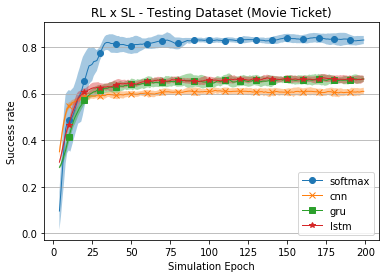

In [35]:
confidence = 1.96
EPOCHS = 200
NUM_SAMPLES = 5

low_success_1 = mean_success_1 - confidence * (std_success_1 / math.sqrt(NUM_SAMPLES))
high_success_1 = mean_success_1 + confidence * (std_success_1 / math.sqrt(NUM_SAMPLES))

low_success_2 = mean_success_2 - confidence * (std_success_2 / math.sqrt(NUM_SAMPLES))
high_success_2 = mean_success_2 + confidence * (std_success_2 / math.sqrt(NUM_SAMPLES))

low_success_3 = mean_success_3 - confidence * (std_success_3 / math.sqrt(NUM_SAMPLES))
high_success_3 = mean_success_3 + confidence * (std_success_3 / math.sqrt(NUM_SAMPLES))

low_success_4 = mean_success_4 - confidence * (std_success_4 / math.sqrt(NUM_SAMPLES))
high_success_4 = mean_success_4 + confidence * (std_success_4 / math.sqrt(NUM_SAMPLES))

plt.xlabel('Simulation Epoch')
plt.ylabel('Success rate')
plt.title('RL x SL - Testing Dataset (Movie Ticket)')
plt.grid(b=True, axis='y')

plt.plot(mean_success_1.index[:EPOCHS] / 100, mean_success_1[:EPOCHS], lw=1, label='softmax', marker='o', markevery=10)
plt.fill_between(mean_success_1.index[:EPOCHS] / 100, low_success_1[:EPOCHS], high_success_1[:EPOCHS], alpha=0.4)

plt.plot(mean_success_2.index[:EPOCHS] / 100, mean_success_2[:EPOCHS], lw=1, label='cnn', marker='x', markevery=10)
plt.fill_between(mean_success_2.index[:EPOCHS] / 100, low_success_2[:EPOCHS], high_success_2[:EPOCHS], alpha=0.4)

plt.plot(mean_success_3.index[:EPOCHS] / 100, mean_success_3[:EPOCHS], lw=1, label='gru', marker='s', markevery=10)
plt.fill_between(mean_success_3.index[:EPOCHS] / 100, low_success_3[:EPOCHS], high_success_3[:EPOCHS], alpha=0.4)

plt.plot(mean_success_4.index[:EPOCHS] / 100, mean_success_4[:EPOCHS], lw=1, label='lstm', marker='*', markevery=10)
plt.fill_between(mean_success_4.index[:EPOCHS] / 100, low_success_4[:EPOCHS], high_success_4[:EPOCHS], alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'comparison_sl_rl_test.png'))

plt.show()

In [11]:
confidence * (std_success_random / math.sqrt(NUM_SAMPLES))[19900]

0.032531713647426776

In [12]:
mean_success_random[19900]

0.8812000000000001

# OTHER STUFF

In [ ]:
confidence = 1.96

In [ ]:
## Jump start
mean_success_boltz.dropna().iat[0] - mean_success_const.dropna().iat[0]

In [ ]:
threshold = max(mean_success_boltz.dropna()) * 0.7
threshold

In [ ]:
## Time to threshold
mean_success_const.dropna()[mean_success_const > threshold].index[0] - mean_success_boltz.dropna()[mean_success_boltz > threshold].index[0]

In [ ]:
max(mean_success_boltz.dropna()) - max(mean_success_const.dropna())

In [ ]:
(mean_success_const.index[:NUM_EPOCHS] // 100)

In [ ]:
mean_success_const.index

In [ ]:
NUM_EPOCHS = 400
NUM_EXPERIMENTS = 2

low_success_const = mean_success_const - confidence * (std_success_const / math.sqrt(NUM_EXPERIMENTS))
high_success_const = mean_success_const + confidence * (std_success_const / math.sqrt(NUM_EXPERIMENTS))

low_success_boltz = mean_success_boltz - confidence * (std_success_boltz / math.sqrt(NUM_EXPERIMENTS))
high_success_boltz = mean_success_boltz + confidence * (std_success_boltz / math.sqrt(NUM_EXPERIMENTS))

plt.xlabel('Simulation Epoch')
plt.ylabel('Success rate')
plt.title('Success Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_success_const.index[:NUM_EPOCHS] // 100, mean_success_const[:NUM_EPOCHS], lw=1, label='flush')
plt.fill_between(mean_success_const.index[:NUM_EPOCHS] // 100, low_success_const[:NUM_EPOCHS], high_success_const[:NUM_EPOCHS], alpha=0.4)

plt.plot(mean_success_boltz.index[:NUM_EPOCHS] // 100, mean_success_boltz[:NUM_EPOCHS], lw=1, label='no_flush')
plt.fill_between(mean_success_boltz.index[:NUM_EPOCHS] // 100, low_success_boltz[:NUM_EPOCHS], high_success_boltz[:NUM_EPOCHS], alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'success_rate.png'))

plt.show()

In [ ]:
with open('./checkpoints/performance_softmax_run0.json_tau', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

In [ ]:
with open('./checkpoints/performance_agt_boltz_3_run0.json_sigma', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

In [ ]:
with open('./checkpoints/performance_agt_boltz_2_run1.json_sigma', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

In [ ]:
low_reward_const = mean_reward_const - confidence * (std_reward_const / math.sqrt(20))
high_reward_const = mean_reward_const + confidence * (std_reward_const / math.sqrt(20))

low_reward_boltz = mean_reward_boltz - confidence * (std_reward_boltz / math.sqrt(20))
high_reward_boltz = mean_reward_boltz + confidence * (std_reward_boltz / math.sqrt(20))

plt.xlabel('Simulation Epoch')
plt.ylabel('Reward rate')
plt.title('Reward Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_reward_const.index / 100, mean_reward_const, lw=1, label='\u03B5-greedy')
plt.fill_between(mean_reward_const.index / 100, low_reward_const, high_reward_const, alpha=0.4)

plt.plot(mean_reward_boltz.index / 100, mean_reward_boltz, lw=1, label='softmax + tl')
plt.fill_between(mean_reward_boltz.index / 100, low_reward_boltz, high_reward_boltz, alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'avg_reward.png'))

plt.show()

In [ ]:
low_round_const = mean_round_const - confidence * (std_round_const / math.sqrt(20))
high_round_const = mean_round_const + confidence * (std_round_const / math.sqrt(20))

low_round_boltz = mean_round_boltz - confidence * (std_round_boltz / math.sqrt(20))
high_round_boltz = mean_round_boltz + confidence * (std_round_boltz / math.sqrt(20))

plt.xlabel('Simulation Epoch')
plt.ylabel('Round rate')
plt.title('Round Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_round_const.index / 100, mean_round_const, lw=1, label='\u03B5-greedy')
plt.fill_between(mean_round_const.index / 100, low_round_const, high_round_const, alpha=0.4)

plt.plot(mean_round_boltz.index / 100, mean_round_boltz, lw=1, label='softmax + tl')
plt.fill_between(mean_round_boltz.index / 100, low_round_boltz, high_round_boltz, alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'avg_round.png'))

plt.show()

# Confusion matrix, precision, recall

In [ ]:
cm_train = pd.read_excel(os.path.join(CHECKPOINTS_PATH, 'confusion_matrix_results32_train.xlsx'), index_col=0)
cm_test = pd.read_excel(os.path.join(CHECKPOINTS_PATH, 'confusion_matrix_results32_test.xlsx'), index_col=0)

In [1]:
def compute_precision(cm, action):
    predicted = cm[action]
    num_correct = predicted[action]
    sum = predicted.sum()
    
    if sum != 0:
        return num_correct / sum
    else:
        return 0
    
def compute_recall(cm, action):
    predicted = cm.loc[action]
    num_correct = predicted[action]
    sum = predicted.sum()
    
    if sum != 0:
        return num_correct / sum
    else:
        return 0
    
def compute_f1score(cm, action, precision=None, recall=None):
    if not precision:
        precision = compute_precision(cm, action)
    
    if not recall:
        recall = copmute_recall(cm, action)
        
    sum = precision + recall
    
    if sum != 0:
        return (2 * precision * recall) / (precision + recall)
    else:
        return 0
    
def compute_metrics(cm):
    metrics = pd.DataFrame(index=cm.index, columns=['precision', 'recall', 'f1-score'])
    
    for action in cm.index:
        precision = compute_precision(cm, action)
        recall = compute_recall(cm, action)
        f1_score = compute_f1score(cm, action, precision, recall)
        metrics.loc[action] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}
        
    return metrics

SyntaxError: unexpected EOF while parsing (<ipython-input-1-d42138d7ce54>, line 8)

In [ ]:
metrics_train = compute_metrics(cm_train)
metrics_tet = compute_metrics(cm_test)

In [ ]:
metrics_train.to_excel(os.path.join(CHECKPOINTS_PATH, 'metrics_train.xlsx'))
metrics_test.to_excel(os.path.join(CHECKPOINTS_PATH, 'metrics_test.xlsx'))